## Predicting the price of Laptop using RandomForest Model

### Data Cleaning 

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
df_laptops = pd.read_csv('input/laptop-price/laptop_price.csv',encoding='latin-1')

# View first 5 rows of data

df_laptops.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
# Converting object datatypes to numerical

df_laptops["Weight"] = df_laptops["Weight"].str.replace("kg","")
df_laptops["Weight"] = pd.to_numeric(df_laptops["Weight"])
df_laptops["Ram"] = df_laptops["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)
df_laptops.drop("laptop_ID",axis=1,inplace=True)

In [4]:
# Check datatypes of each column

df_laptops.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
dtype: object

In [5]:
# Check if null values exist in any columns

df_laptops.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

## Visualizing the Key Findings in the data

#### ****Number of products launched by each company****

Text(0.5, 1.0, 'Products launched Per Company')

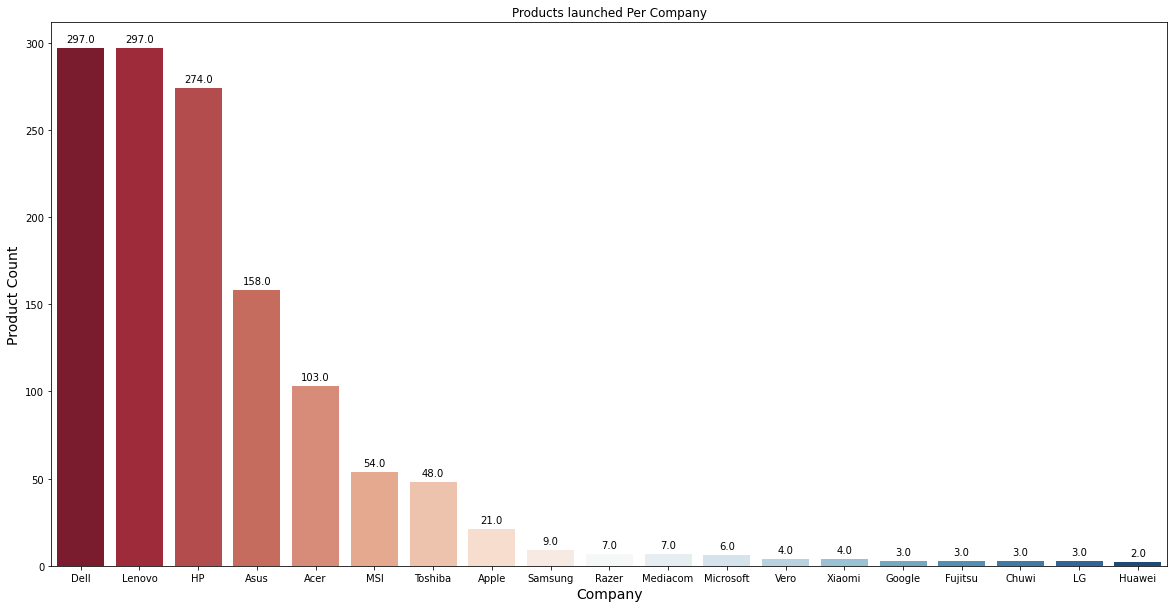

In [6]:
df_company_sales = df_laptops.groupby("Company")["Company"].count()

company_products = pd.DataFrame(data = df_company_sales)
company_products.columns = ["product count"]
company_products.sort_values(by="product count",ascending=False,inplace=True)

# Plotting the figure

plt.figure(figsize = (20,10))
splot = sns.barplot(data = company_products,x= company_products.index, y = 'product count',palette = 'RdBu')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Company", size=14)
plt.ylabel("Product Count", size=14)
plt.title('Products launched Per Company')

#### ****Average price of product for each company****

Text(0.5, 1.0, 'Average Price Per Company')

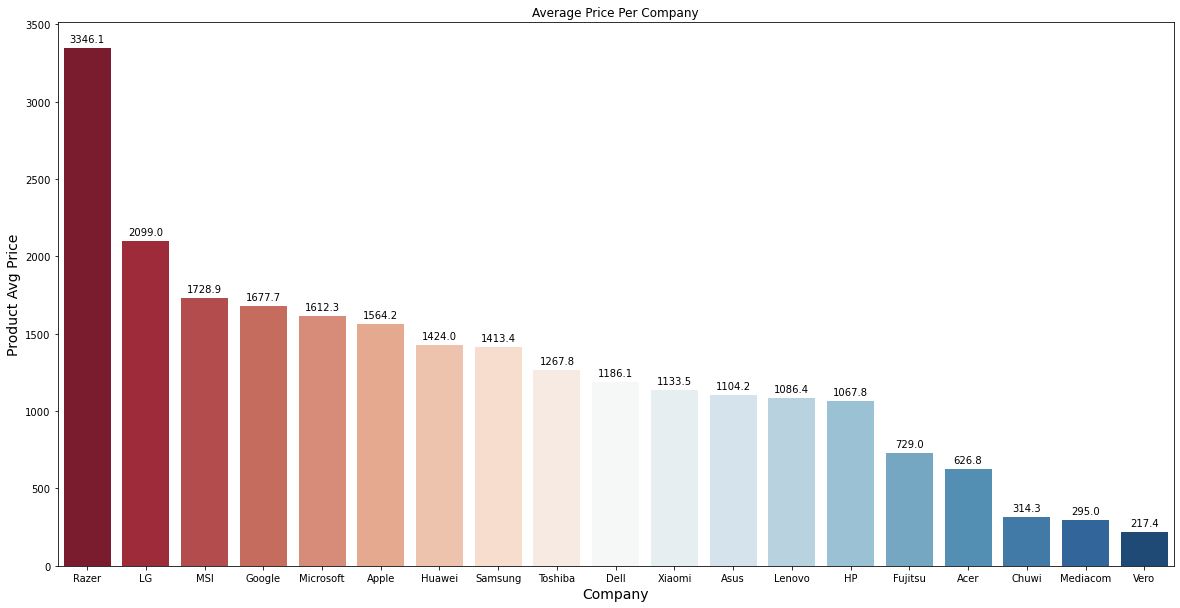

In [7]:
df_product_price = df_laptops.groupby("Company")["Price_euros"].mean()

df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

plt.figure(figsize = (20,10))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price',palette = 'RdBu')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Company", size=14)
plt.ylabel("Product Avg Price", size=14)
plt.title('Average Price Per Company')

## Removing Company Razer from model for better predictions as its a gaming company and prices are very high

In [8]:
df_laptops = df_laptops[df_laptops["Company"]!= "Razer"]

#### ****Average price of product by Model type****

Text(0.5, 1.0, 'Average Price Per Model')

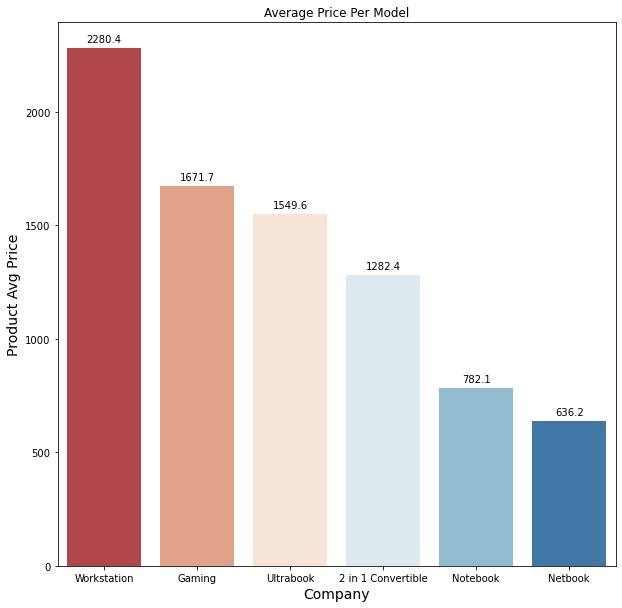

In [9]:
df_product_price = df_laptops.groupby("TypeName")["Price_euros"].mean()

df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

plt.figure(figsize = (10,10))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price',palette = 'RdBu')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Company", size=14)
plt.ylabel("Product Avg Price", size=14)
plt.title('Average Price Per Model')

### Split data into X and y

In [10]:
X = df_laptops.drop("Price_euros",axis=1)
y = df_laptops["Price_euros"]

### Transforming the Data to Train

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Company","Product","TypeName","ScreenResolution","Cpu","Gpu","Memory","OpSys","Ram"]
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)], remainder="passthrough")

In [12]:
transformed_X = transformer.fit_transform(X)

In [13]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,955,956,957,958,959,960,961,962,963,964
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.3,1.37
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.3,1.34
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.6,1.86
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.4,1.83
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.3,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.80
1292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.3,1.30
1293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.50
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6,2.19


### Fit the RandomForest Regressor Model


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

# Fit model

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7259980734322917

## Improve Model score by using GridSearch CV

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Checking the cross-validation score

rf = RandomForestRegressor(n_estimators=120, random_state=42)
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8198540232206584

## Still Improving the model without defaults

In [16]:
# create the grid
n_estimators = [10,20,40,80]
max_depth = [None,20,30,40,50]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [17]:
# create the default model
rf = RandomForestRegressor(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [18]:
grid_result.best_estimator_

RandomForestRegressor(max_depth=30, n_estimators=80, random_state=42)

In [19]:
grid_result.best_score_

0.8107418817079525

In [20]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.810742 using {'max_depth': 30, 'n_estimators': 80}
0.792423 (0.036603) with: {'max_depth': None, 'n_estimators': 10}
0.800944 (0.044354) with: {'max_depth': None, 'n_estimators': 20}
0.808847 (0.046611) with: {'max_depth': None, 'n_estimators': 40}
0.809844 (0.047384) with: {'max_depth': None, 'n_estimators': 80}
0.790356 (0.039222) with: {'max_depth': 20, 'n_estimators': 10}
0.799958 (0.044194) with: {'max_depth': 20, 'n_estimators': 20}
0.805791 (0.046559) with: {'max_depth': 20, 'n_estimators': 40}
0.807276 (0.047572) with: {'max_depth': 20, 'n_estimators': 80}
0.794129 (0.037178) with: {'max_depth': 30, 'n_estimators': 10}
0.802015 (0.044212) with: {'max_depth': 30, 'n_estimators': 20}
0.810585 (0.045456) with: {'max_depth': 30, 'n_estimators': 40}
0.810742 (0.047219) with: {'max_depth': 30, 'n_estimators': 80}
0.792423 (0.036603) with: {'max_depth': 40, 'n_estimators': 10}
0.800944 (0.044354) with: {'max_depth': 40, 'n_estimators': 20}
0.808786 (0.046578) with: {'max_depth

### Buildng Random Forest model with Best parameters

In [69]:
# Fit model

model_rf = RandomForestRegressor(max_depth=30, n_estimators=80)
model_rf.fit(X_train,y_train)
model_rf.score(X_test,y_test)

0.718212734874028

## Changing to SVR Model to check Model Score

In [27]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats

np.random.seed(42)

# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)


In [60]:
# Defining Parameters

C_arr = [65000,70000,72000]
eps_arr = [20,25,30]

In [61]:
# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','correlation']
for C in C_arr:
    for epsilon in eps_arr:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        Y_pred = model.predict(X_test)
        corr = stats.pearsonr(y_test,Y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['correlation'], ascending=False)
hyper_df

,c,epsilon,correlation
0,65000,20,0.930772
1,65000,25,0.930764
2,65000,30,0.930612
3,70000,20,0.930159
4,70000,25,0.929998
6,72000,20,0.929929
5,70000,30,0.929851
7,72000,25,0.929748
8,72000,30,0.929591


In [71]:
# Building SVR model with best parameters

model_svr = SVR(kernel='rbf', C=65000, epsilon=25) # set kernel and hyperparameters
svr = model_svr.fit(X_train, y_train)

### Comparing Random Forest and SVR Model scores using test data

In [72]:
# Comparing models

y_rf = model_rf.predict(X_test)
y_svr = model_svr.predict(X_test)

print("Random Forest Correlation : ", stats.pearsonr(y_test,y_rf)[0])
print("SVR Correlation : ", stats.pearsonr(y_test,y_svr)[0])

print("\nRandom Forest Correlation MSE : ", ((y_rf - y_test)**2).mean(axis=None))
print("SVR MSE : ", ((y_svr - y_test)**2).mean(axis=None))

Random Forest Correlation :  0.8484003167827423
SVR Correlation :  0.9307643668560397

Random Forest Correlation MSE :  135914.2786649845
SVR MSE :  68205.02343360402


## Visualizing the predicted and Actual prices of Laptops

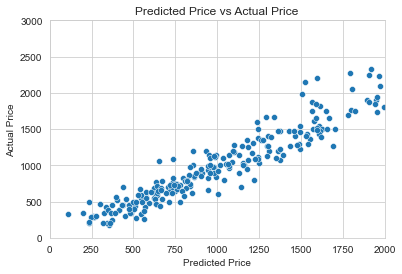

In [73]:
import matplotlib.pyplot as plt

y_predict = model_svr.predict(X_test)

analyse = pd.DataFrame({"predicted_price":y_predict,"actual_price":y_test})

tips = sns.load_dataset("tips")
sns.set_style("whitegrid")
fig = sns.scatterplot( x= y_predict, y= y_test,data=analyse)
fig = fig.set(xlim=(0,2000),ylim=(0,3000))
plt.title("Predicted Price vs Actual Price")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show(fig)

## Sample Prediction Values

In [74]:
analyse.head(5)

,predicted_price,actual_price
599,1799.967438,1763.00
347,1579.704163,1607.96
747,671.637835,539.00
1034,1493.289423,1228.99
1164,593.923000,476.99
